In [2]:
# imports
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
plt.style.use('seaborn')
mpl.rc('font', size=13)
mpl.rc('axes', labelsize='large')
mpl.rc('xtick', labelsize='large')
mpl.rc('ytick', labelsize='large')

plt.rcParams['figure.figsize'] = [20, 10] # For larger plots

In [4]:
df = pd.read_stata("./Data/DHS/BJBR71DT/BJBR71FL.DTA", convert_categoricals=False)

In [77]:
df.head()

,caseid,bidx,v000,v001,v002,v003,v004,v005,v006,v007,...,s1211,s1212,s1213,s1214,s1215,s1216,s1217,s1218,s1219,s1220
0,1 3 2,1,BJ7,1,3,2,1,1134416,1,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1 3 2,2,BJ7,1,3,2,1,1134416,1,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1 3 4,1,BJ7,1,3,4,1,1134416,1,2018,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
3,1 3 4,2,BJ7,1,3,4,1,1134416,1,2018,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
4,1 9 2,1,BJ7,1,9,2,1,1134416,1,2018,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


In [89]:
df['v171a'].unique()

array([0, 1, 2], dtype=int8)

In [91]:
# Important variables
# background

edu = 'v106'
beat = 'v744'
age_group = 'v013'
litteracy = 'v155'
media_paper = 'v157'
media_radio = 'v158'
media_tv = 'v159'
sample_weight = 'v005' # must be divided by 1e6
ever_married = 'v020'
# residence = 'v025'
time2water = 'v115'

has_elec = 'v119'
has_radio = 'v120'
has_tv = 'v121'

has_frige='v122'
has_bicycle = 'v123'
has_moto = 'v124'
has_car = 'v125'
religion = 'v130'
ethnicity = 'v131'
place_of_residence = 'v134'
edu_attainment = 'v149'
relation2household_head='v150'
sex_household_head = 'v151'
age_household_head = 'v152'

has_phone_landline='v153'
has_phone_mobile='v169A'
use_internet = 'v171a'
use_internet_last_month = 'v171b'
wealth_index = 'v191'

total_child_born = 'v201'
num_sons_died = 'v206'
num_daughters_died = 'v207'
num_living_child = 'V218'

selected_for_dom_violence_interview = 'v044'

husband_edu_level = 's904'
husband_occupation = 's908a'
resp_occupation = 's913a'

# Domestic violence
is_currently_in_union= 'v502'
weight_dom_violence = 'd005'
num_control_issues = 'd102'
emotional_violence='d104'
physical_violence = 'd105' # a-n detailed acts of violence
physical_violence_less_severe = 'd106'
physical_violence_severe = 'd107'
sexual_violence = 'd108'
# ay_violence = 'd105' or 'd106' or 'd107'

violence_to_husband ='d112'
partner_drinks_alcohol='d113'
partner_drinks_alcohol_freq= 'd114'
sought_help = 'd119' # a to xk; y=no one
mother_beaten = 'd121'


edu_w = 'v106' # education level women, value =0-3
edu_m = 'mv106' # education level men, 

# question about beating
beat_w_a = "v744a"
beat_w_b = "v744b"
beat_w_c = "v744c"
beat_w_d = "v744d"
beat_w_e = "v744e"
beat_w = "beat_w"

beat_m_a = "mv744a"
beat_m_b = "mv744b"
beat_m_c = "mv744c"
beat_m_d = "mv744d"
beat_m_e = "mv744e"



#Age (v012) is recorded in
#completed years, and is typically reported in 5-year groups (v013). 
age_group_w = "v013"
# Info for men is in the Men's individual recode (MR) dataset


<AxesSubplot:xlabel='v106', ylabel='v013'>

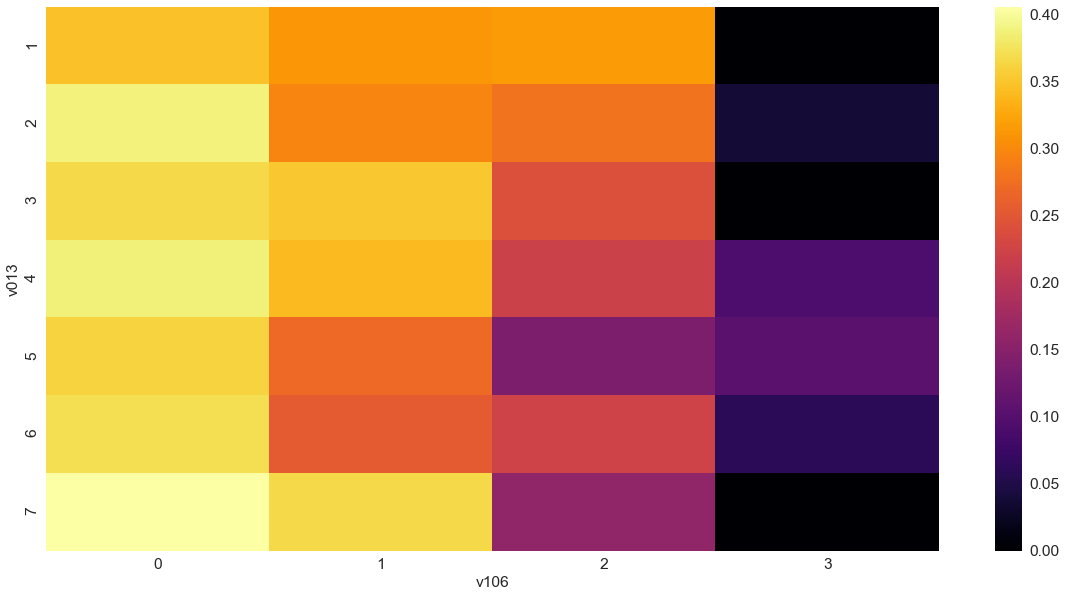

In [90]:
df_small = df[[edu_w, age_group_w]].copy()
df_small.loc[:,"beat_w"] = df.loc[:,[beat_w_a, beat_w_b, beat_w_c, beat_w_d, beat_w_e]].sum(axis=1)>0
beat_w_df = df_small.pivot_table(columns=edu_w, index=age_group_w, values=beat_w, fill_value=0)
sns.heatmap(beat_w_df,cmap='inferno')

In [94]:
temp = df[[edu_w, age_group_w]].copy()
temp.loc[:,"beat_w"] = df.loc[:,[beat_w_a, beat_w_b, beat_w_c, beat_w_d, beat_w_e]].sum(axis=1)>0
temp.loc[:,"actual_violence"] = df.loc[:,[physical_violence_less_severe,
                                         physical_violence_severe,
                                         sexual_violence]].sum(axis=1)>0



# temp_pivot = temp[['beat_w', 'actual_violence']].pivot_table(columns="beat_w", index="actual_violence", fill_value=0)
# sns.heatmap(temp_pivot,cmap='inferno')

KeyError: "None of [Index(['d106', 'd107', 'd108'], dtype='object')] are in the [columns]"

In [95]:
df.head()

,caseid,bidx,v000,v001,v002,v003,v004,v005,v006,v007,...,s1211,s1212,s1213,s1214,s1215,s1216,s1217,s1218,s1219,s1220
0,1 3 2,1,BJ7,1,3,2,1,1134416,1,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1 3 2,2,BJ7,1,3,2,1,1134416,1,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1 3 4,1,BJ7,1,3,4,1,1134416,1,2018,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
3,1 3 4,2,BJ7,1,3,4,1,1134416,1,2018,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
4,1 9 2,1,BJ7,1,9,2,1,1134416,1,2018,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


<AxesSubplot:xlabel='v106', ylabel='v013'>

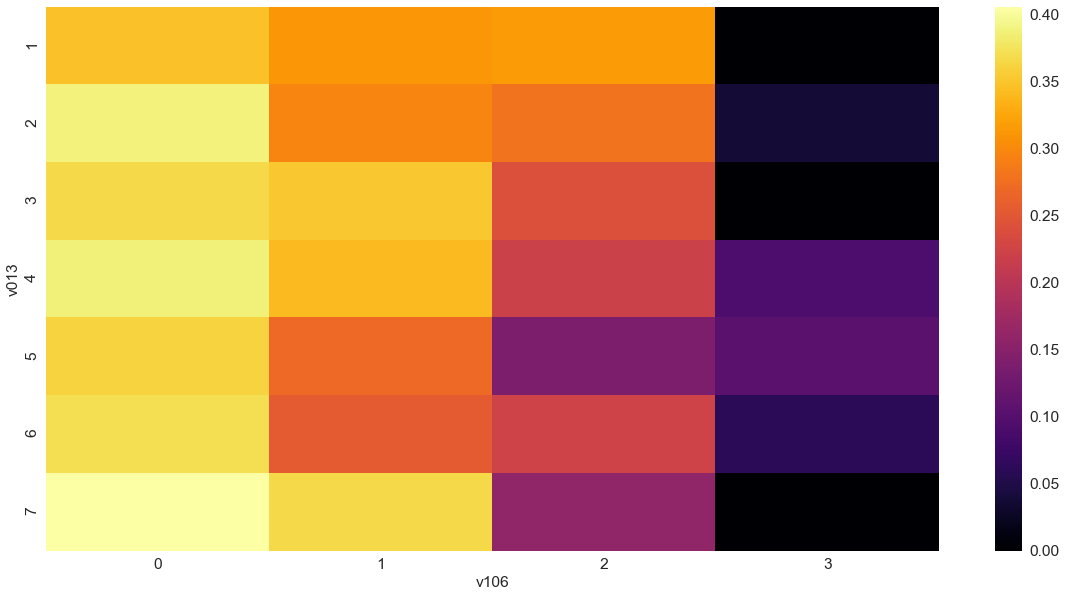